<a href="https://colab.research.google.com/github/hanansuk/guns_n_roses/blob/main/ICPSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('lmtest')
install.packages('sandwich')
install.packages('stargazer')
install.packages('corrplot')
install.packages('plotly')
install.packages('googledrive')
install.packages('httpuv')
install.packages('reshape2')
install.packages('ggrepel')
install.packages('wordcloud')
install.packages('RColorBrewer')
install.packages('wordcloud2')
install.packages('tm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is un

In [3]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)
library(sandwich)
library(lmtest)
library(stargazer)
library(cli)
library(corrplot)
library(scales)
library(tidyverse)
library(stats)
# library(plotly)
library(ggrepel)
library(reshape2)
library(googledrive) 
library(httpuv)
library(repr)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


corrplot 0.92 loaded

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


Attaching package: ‘reshape2

In [4]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may update python version  
                                       #occasionally
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

In [5]:
lagpad <- function(x, k) {
  if (k>0 & (k %% 5 != 0)) {
    return (c(rep(NA, k), x)[1 : length(x)] );
  }
  else {
    return (c(x[(-k+1) : length(x)], rep(NA, -k)));
  }
}

In [14]:
x <- drive_get("~/37363-0001-Data.tsv")
drive_download(x, overwrite = TRUE)
icpsr <- read_tsv("/content/37363-0001-Data.tsv")

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• 37363-0001-Data.tsv <id: 1hGNaiFhflrS_ei59ZlhU3zgq170GYm-u>

Saved locally as:

• 37363-0001-Data.tsv

Rows: 1450 Columns: 137
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (1): STATE
dbl (136): YEAR, FELONY, INVCOMMITMENT, INVOUTPATIENT, DANGER, DRUGMISDEMEAN...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
summary(icpsr)

    STATE                YEAR          FELONY       INVCOMMITMENT   
 Length:1450        Min.   :1991   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:1998   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :2005   Median :1.0000   Median :0.0000  
                    Mean   :2005   Mean   :0.6841   Mean   :0.4648  
                    3rd Qu.:2012   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :2019   Max.   :1.0000   Max.   :1.0000  
 INVOUTPATIENT        DANGER       DRUGMISDEMEANOR   ALCTREATMENT    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   :0.2228   Mean   :0.4366   Mean   :0.1862   Mean   :0.09862  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
   ALCOHOLISM     RELINQUIS

In [16]:
glimpse(icpsr)
head(icpsr)

Rows: 1,450
Columns: 137
$ STATE                        <chr> "Alabama", "Alaska", "Arizona", "Arkansas…
$ YEAR                         <dbl> 1991, 1991, 1991, 1991, 1991, 1991, 1991,…
$ FELONY                       <dbl> 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,…
$ INVCOMMITMENT                <dbl> 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,…
$ INVOUTPATIENT                <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ DANGER                       <dbl> 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,…
$ DRUGMISDEMEANOR              <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,…
$ ALCTREATMENT                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ ALCOHOLISM                   <dbl> 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ RELINQUISHMENT               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ VIOLENT                      <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ VIOLENTH                     <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ VIOLENTPARTIA

STATE,YEAR,FELONY,INVCOMMITMENT,INVOUTPATIENT,DANGER,DRUGMISDEMEANOR,ALCTREATMENT,ALCOHOLISM,RELINQUISHMENT,⋯,EXPARTEDATING,DVROSURRENDER,DVROSURRENDERNOCONDITIONS,DVROSURRENDERDATING,EXPARTESURRENDER,EXPARTESURRENDERNOCONDITIONS,EXPARTESURRENDERDATING,DVROREMOVAL,STALKING,LAWTOTAL
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,1991,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,15
Alaska,1991,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,10
Arizona,1991,0,1,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,12
Arkansas,1991,1,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,15
California,1991,1,1,0,1,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,58
Colorado,1991,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,9


In [17]:
## final export
write.csv(icpsr, "ICPSR.csv", row.names=FALSE)

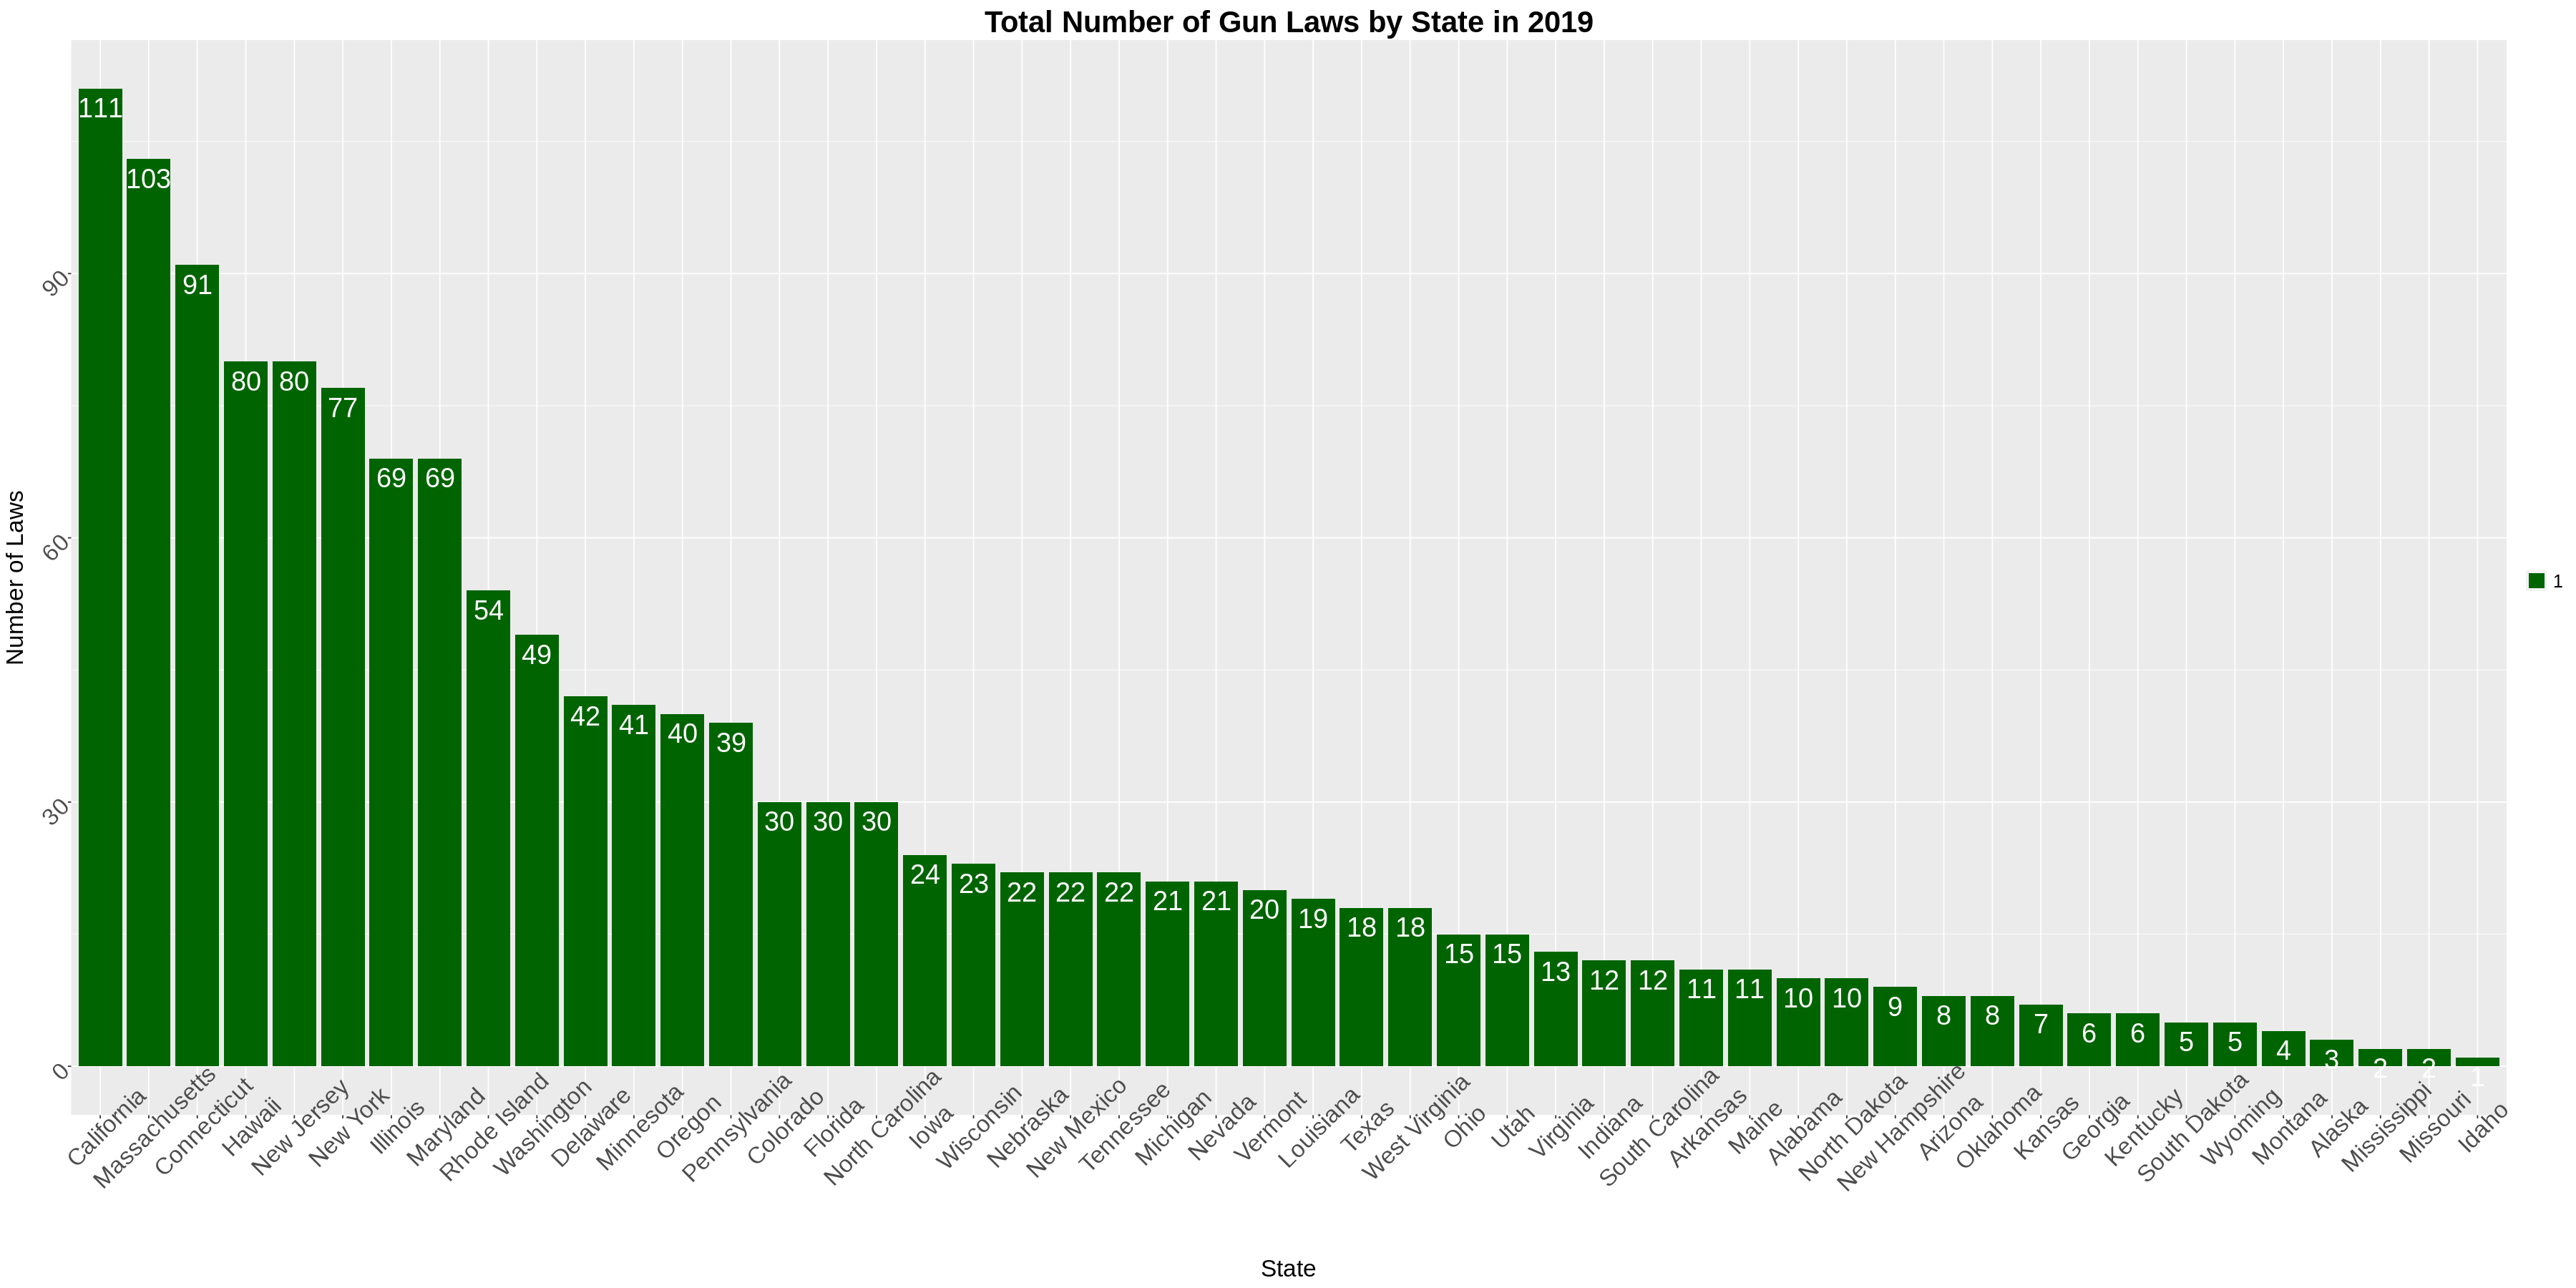

In [48]:
options(repr.plot.width=30, repr.plot.height=15)

icpsr %>%
  arrange(desc(LAWTOTAL)) %>%
  filter(YEAR == 2019) %>%
  ggplot(aes(x = reorder(STATE, -LAWTOTAL), y = LAWTOTAL)) +
    geom_bar(stat="sum", fill = 'darkgreen') +
    geom_text(aes(label = LAWTOTAL), vjust = 1.5, colour = "white", size = 8) + 
    # geom_text(aes(label = after_stat(y), group = Year), stat = 'summary', fun = sum, size = 7, position = position_stack(vjust = 1.1)) +
    labs(title = "Total Number of Gun Laws by State in 2019", x = "State", y = "Number of Laws") +
    scale_y_continuous(labels = scales::label_comma()) +
    theme(
      axis.title = element_text(size = 20),
      axis.text = element_text(size = 10, angle = 45),
      legend.title = element_blank(),
      legend.text = element_text(size = 15),
      plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
      axis.text.x = element_text(size = rel(2)),
      axis.text.y = element_text(size = rel(2))
    )

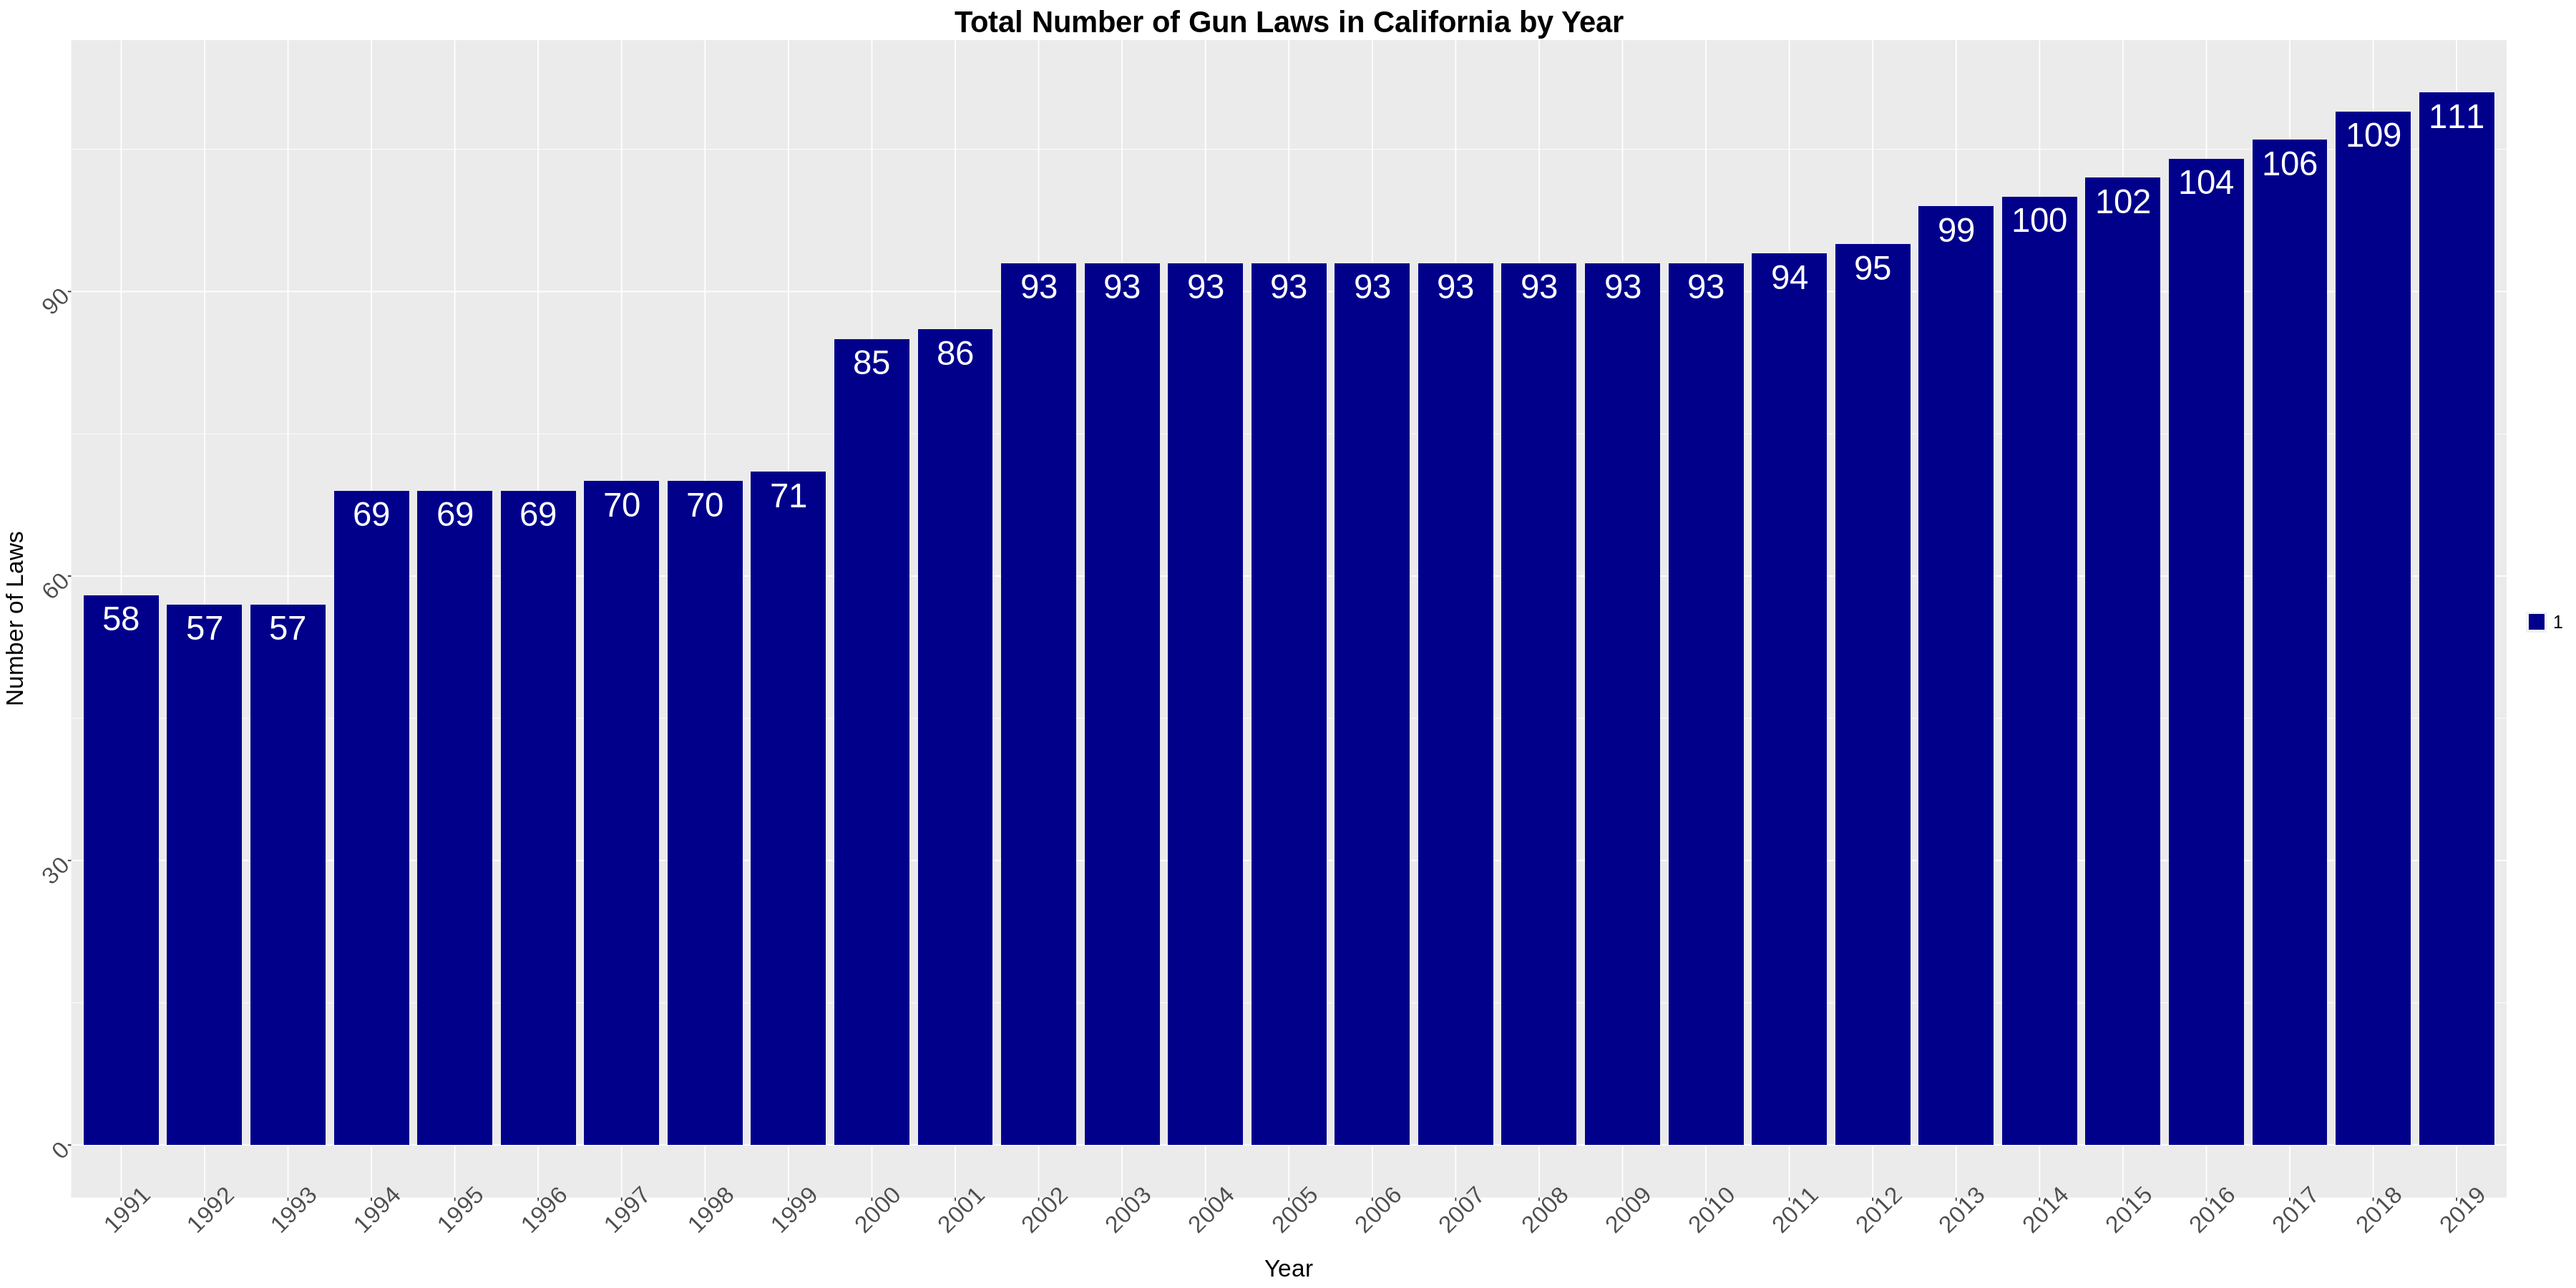

In [44]:
options(repr.plot.width=30, repr.plot.height=15)

icpsr %>%
  filter(tolower(STATE) == 'california') %>%
  ggplot(aes(x = reorder(YEAR, YEAR), y = LAWTOTAL)) +
    geom_bar(stat="sum", fill = 'darkblue') +
    geom_text(aes(label = LAWTOTAL), vjust = 1.5, colour = "white", size = 10) + 
    # geom_text(aes(label = after_stat(y), group = Year), stat = 'summary', fun = sum, size = 7, position = position_stack(vjust = 1.1)) +
    labs(title = "Total Number of Gun Laws in California by Year", x = "Year", y = "Number of Laws") +
    scale_y_continuous(labels = scales::label_comma()) +
    theme(
      axis.title = element_text(size = 20),
      axis.text = element_text(size = 10, angle = 45),
      legend.title = element_blank(),
      legend.text = element_text(size = 15),
      plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
      axis.text.x = element_text(size = rel(2)),
      axis.text.y = element_text(size = rel(2))
    )